<a href="https://colab.research.google.com/github/hikikae/worldBank/blob/main/EDAWorldBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de los Datos (EDA) ☘
---



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_json('/content/raw_data.json')    
df.head(1)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,702976832.0,,,0


Los campos están anidados por lo que tenemos que normalizar el json

In [34]:
#flat json 
df= pd.concat([pd.json_normalize(df['indicator']).add_prefix('indicator.'),
                    pd.json_normalize(df['country']).add_prefix('country.'),
                     df.drop(['indicator', 'country'], axis=1)], axis=1) 
df.head(1)

,indicator.id,indicator.value,country.id,country.value,countryiso3code,date,value,unit,obs_status,decimal
0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,AFE,2021,702976832.0,,,0


Una vez normalizado conozcamos los datos que tiene nuestro dataset 

In [ ]:
""" 
https://datahelpdesk.worldbank.org/knowledgebase/articles/1886674-new-features-and-enhancements-in-the-v2-api

id.indicador      object  abreviación del indicador
value.indicador   object  indicador
id.country         object  abreviación del pais
value.country      object  país
countryiso3code    object  país en formato iso3
date               int64   source’s most recent update
value              float64  población cantidad
unit               float64  tipo de moneda 
obs_status         float64  Indicates the observation status for country, indicator and year combination. For example, <wb:obs_status> F </wb:obs_status> in the response indicates that the observation status for that data point is “forecast”.
decimal            int64    Precisión: If the user requests scaling, the precision of the decimal point will be based on the <wb:decimal> tag value, found in the response. If <wb:decimal> is 1 then the scaled value will have precision up to 1 decimal point. For example, if the data value is 2500 and <wb:decimal> is 1, then the data value will be scaled to 2.5 and <wb:scale> will read “thousands”."""

## Paso 1. Revisión de duplicados 

In [35]:
# No hay duplicados
df[df.duplicated()]

,indicator.id,indicator.value,country.id,country.value,countryiso3code,date,value,unit,obs_status,decimal


## Paso 2. Revisión de nulos

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator.id     16492 non-null  object 
 1   indicator.value  16492 non-null  object 
 2   country.id       16492 non-null  object 
 3   country.value    16492 non-null  object 
 4   countryiso3code  16492 non-null  object 
 5   date             16492 non-null  int64  
 6   value            16400 non-null  float64
 7   unit             16492 non-null  object 
 8   obs_status       16492 non-null  object 
 9   decimal          16492 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.3+ MB


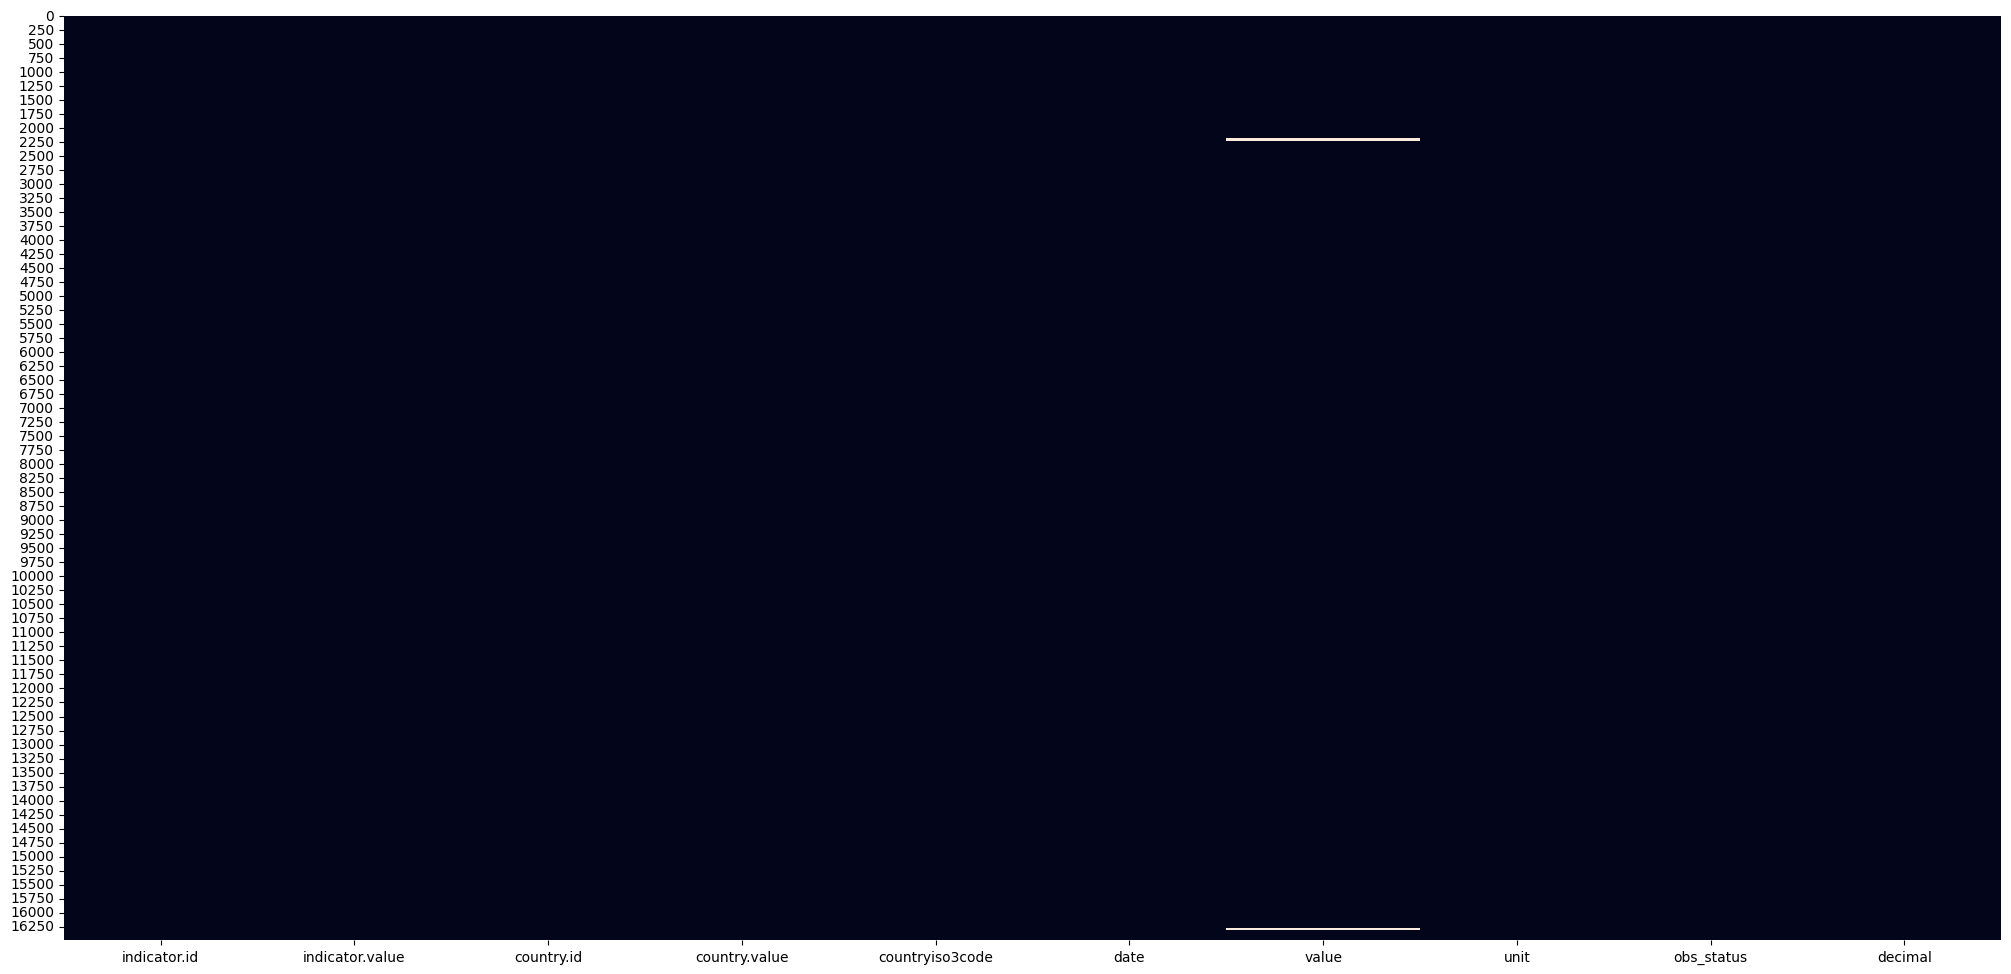

In [39]:
plt.figure(figsize= (25,12))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Hay 92 nulos veamos en donde se encuentran 

In [29]:
df[df['value'].isnull()]['country.value'].unique()

array(['Not classified', 'West Bank and Gaza'], dtype=object)

In [32]:
# No se sabe exactamente para que es este valor y se puede llenar con 0 o eliminar los valores
df[(df['country.value']=='Not classified') & df['value'].isnull()].head(3)

,indicator.id,indicator.value,country.id,country.value,countryiso3code,date,value,unit,obs_status,decimal
2170,SP.POP.TOTL,"Population, total",XY,Not classified,,2021,NaN,,,0
2171,SP.POP.TOTL,"Population, total",XY,Not classified,,2020,NaN,,,0
2172,SP.POP.TOTL,"Population, total",XY,Not classified,,2019,NaN,,,0


In [30]:
# En el caso de West Bank and Gaza de 1960 a 1989 podria suponerse que no se registó la cantidad
#de población, en este caso cualquier decisión podría afectar su estudio, como el 
#llenar de ceros o llenar con el año que sí se tiene registro
df[(df['country.value']=='West Bank and Gaza') & df['value'].isnull()]

,indicator.id,indicator.value,country.id,country.value,countryiso3code,date,value,unit,obs_status,decimal
16276,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1989,NaN,,,0
16277,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1988,NaN,,,0
16278,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1987,NaN,,,0
16279,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1986,NaN,,,0
16280,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1985,NaN,,,0
16281,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1984,NaN,,,0
16282,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1983,NaN,,,0
16283,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1982,NaN,,,0
16284,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1981,NaN,,,0
16285,SP.POP.TOTL,"Population, total",PS,West Bank and Gaza,PSE,1980,NaN,,,0




> Eliminamos algunas columnas que son redundantes o no contienen informacion






In [42]:
df[df['unit'] == ''].head(3)

,indicator.id,indicator.value,country.id,country.value,countryiso3code,date,value,unit,obs_status,decimal
0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,AFE,2021,702976832.0,,,0
1,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,AFE,2020,685112705.0,,,0
2,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,AFE,2019,667242712.0,,,0


In [43]:
#Las columnas de unit y obs_satatus se encuentran vacias por lo que procedemos a eliminarlas
df= df.drop(['unit', 'obs_status'], axis=1)


In [44]:
#Revisamos que contiene la columna decimal [0], significa que todos están
#expresados en forma no cientifica, por lo que tambien podriamos eliminar esta
#columna
df['decimal'].unique()

array([0])

In [45]:
df= df.drop(['decimal'], axis=1)

In [49]:
#Podriamos eliminar las columnas de indicador, ya que es la misma informacion
#en cada columna, solo hay que especificar que es de population
df= df.drop(['indicator.id', 'indicator.value'], axis=1)

## Paso 3. Detección de Outliers

En la opcion de value.country, se enlistan ademas de los países algunas otras clasificaciones, como income, world, entre otros que pueden ser malinterpretados como outliers

In [52]:
lista=['High income', 'Low income', 'Lower middle income',
       'Not classified', 'Upper middle income']
df[df['country.value'].isin(lista)].head(3)

,country.id,country.value,countryiso3code,date,value
992,XD,High income,,2021,1.240630e+09
993,XD,High income,,2020,1.240901e+09
994,XD,High income,,2019,1.235869e+09


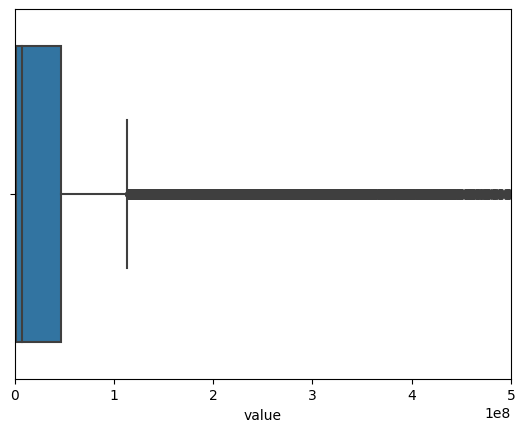

In [53]:
#Observemos el comportamiento con todos los datos
sns.boxplot(x = 'value', data= df)
plt.xlim(0, 500000000)
plt.show()

In [ ]:
df['value'].describe()

count    1.640000e+04
mean     2.140804e+08
std      7.040554e+08
min      2.646000e+03
25%      9.863025e+05
50%      6.731400e+06
75%      4.602445e+07
max      7.888409e+09
Name: value, dtype: float64

Revisemos si hay algun error en la columna de country.value

In [56]:
#Se conocen 217 paises asi que aqui esta el problema 
print(len(df['country.value'].unique().tolist()))

266


In [57]:
df['country.value'].unique().tolist()

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'M

El outlier que aparece es el de la categoria de World que enlista la cantidad de poblacion en el mundo durante los años 


In [54]:
df.loc[df['value'] == df['value'].max()]


,country.id,country.value,countryiso3code,date,value
2976,1W,World,WLD,2021,7.888409e+09


# Análisis de Datos (Gráficas) ⭐

---



In [58]:
datosMundo=df[df['country.value']=='World']

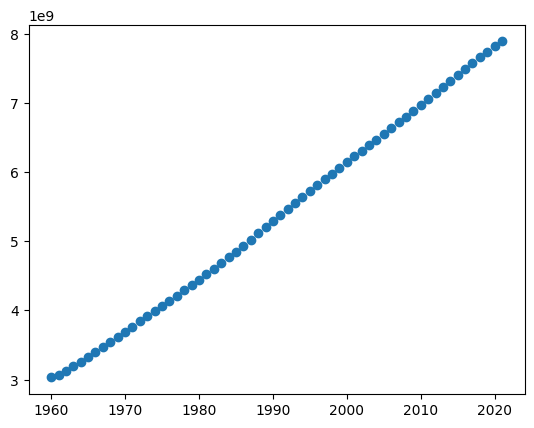

In [59]:
plt.scatter(datosMundo['date'],datosMundo['value'])


In [61]:
df_countries = df.iloc[3038:]
df_countries.to_csv('./country_data.csv', index=False)
df_countries.head(3)

,country.id,country.value,countryiso3code,date,value
3038,AF,Afghanistan,AFG,2021,40099462.0
3039,AF,Afghanistan,AFG,2020,38972230.0
3040,AF,Afghanistan,AFG,2019,37769499.0


In [62]:
poblacion2021= df_countries[df_countries['date']==2021]
poblacion2021 = poblacion2021.sort_values('value', ascending=False)
poblacion2021

,country.id,country.value,countryiso3code,date,value
5580,CN,China,CHN,2021,1.412360e+09
8556,IN,India,IND,2021,1.407564e+09
15810,US,United States,USA,2021,3.318937e+08
8618,ID,Indonesia,IDN,2021,2.737532e+08
12276,PK,Pakistan,PAK,2021,2.314021e+08
...,...,...,...,...,...
14384,MF,St. Martin (French part),MAF,2021,3.194800e+04
4712,VG,British Virgin Islands,VGB,2021,3.112200e+04
12338,PW,Palau,PLW,2021,1.802400e+04
11532,NR,Nauru,NRU,2021,1.251100e+04


## **Los 10 paises mas poblados en 2021**

In [63]:
#Los 10 paises mas poblados en 2021
top10maspoblados= poblacion2021.head(10)
top10maspoblados

,country.id,country.value,countryiso3code,date,value
5580,CN,China,CHN,2021,1.412360e+09
8556,IN,India,IND,2021,1.407564e+09
15810,US,United States,USA,2021,3.318937e+08
8618,ID,Indonesia,IDN,2021,2.737532e+08
12276,PK,Pakistan,PAK,2021,2.314021e+08
4650,BR,Brazil,BRA,2021,2.143262e+08
11966,NG,Nigeria,NGA,2021,2.134013e+08
3968,BD,Bangladesh,BGD,2021,1.693563e+08
13020,RU,Russian Federation,RUS,2021,1.434493e+08
10912,MX,Mexico,MEX,2021,1.267051e+08


In [66]:
import plotly.express as px

fig = px.bar(y=top10maspoblados['value'].values, 
             x=top10maspoblados['country.value'], 
             color=top10maspoblados.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10maspoblados['value'].values,
             title='Países más poblados (2021)',
             template='plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font=dict(size=15, family="Franklin Gothic"))
fig.show() 

## **Los 10 paises menos poblados en 2021**




In [67]:
#Los 10 paises menos poblados en 2021
top10menospoblados= poblacion2021.tail(10)
top10menospoblados

,country.id,country.value,countryiso3code,date,value
10726,MH,Marshall Islands,MHL,2021,42050.0
10106,LI,Liechtenstein,LIE,2021,39039.0
11098,MC,Monaco,MCO,2021,36686.0
13206,SM,San Marino,SMR,2021,33745.0
7688,GI,Gibraltar,GIB,2021,32669.0
14384,MF,St. Martin (French part),MAF,2021,31948.0
4712,VG,British Virgin Islands,VGB,2021,31122.0
12338,PW,Palau,PLW,2021,18024.0
11532,NR,Nauru,NRU,2021,12511.0
15500,TV,Tuvalu,TUV,2021,11204.0


In [69]:
import plotly.express as px

fig = px.bar(y=top10menospoblados['value'].values, 
             x=top10menospoblados['country.value'], 
             color=top10menospoblados.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10menospoblados['value'].values,
             title='Países menos poblados (2021)',
             template='plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font=dict(size=15, family="Franklin Gothic"))
fig.show() 


## **Tipos de ingreso a lo largo de los años** 

In [71]:
# este parametro confunde 'Low & middle income',
income=['Upper middle income', 'Low income', 'Lower middle income', 'High income'] 
df_income=df[df['country.value'].isin(income)]
df_income

,country.id,country.value,countryiso3code,date,value
992,XD,High income,,2021,1.240630e+09
993,XD,High income,,2020,1.240901e+09
994,XD,High income,,2019,1.235869e+09
995,XD,High income,,2018,1.230678e+09
996,XD,High income,,2017,1.224733e+09
...,...,...,...,...,...
2971,XT,Upper middle income,,1964,1.185659e+09
2972,XT,Upper middle income,,1963,1.158649e+09
2973,XT,Upper middle income,,1962,1.131292e+09
2974,XT,Upper middle income,,1961,1.115320e+09


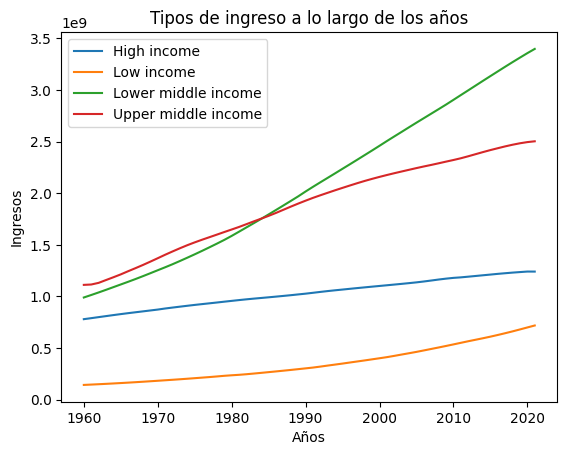

In [72]:
# Agrupar los datos por tipo de ingreso
grouped = df_income.groupby('country.value')

# Generar una gráfica para cada grupo
for name, group in grouped:
    plt.plot(group['date'], group['value'], label=name)

# Configurar la leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('Años')
plt.ylabel('Ingresos')
plt.title('Tipos de ingreso a lo largo de los años')

# Mostrar la gráfica
plt.show()



## **Predicción de población mundial** 

In [74]:
#en la actualidad india es el pais con más población, podemos intentar predecir 
datosMundo.head(3)

,country.id,country.value,countryiso3code,date,value
2976,1W,World,WLD,2021,7.888409e+09
2977,1W,World,WLD,2020,7.820982e+09
2978,1W,World,WLD,2019,7.742682e+09


In [75]:
import numpy as np
# fitting our data

x = datosMundo['date']      
y = datosMundo['value']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 8.17666572e+07, -1.57389830e+11])

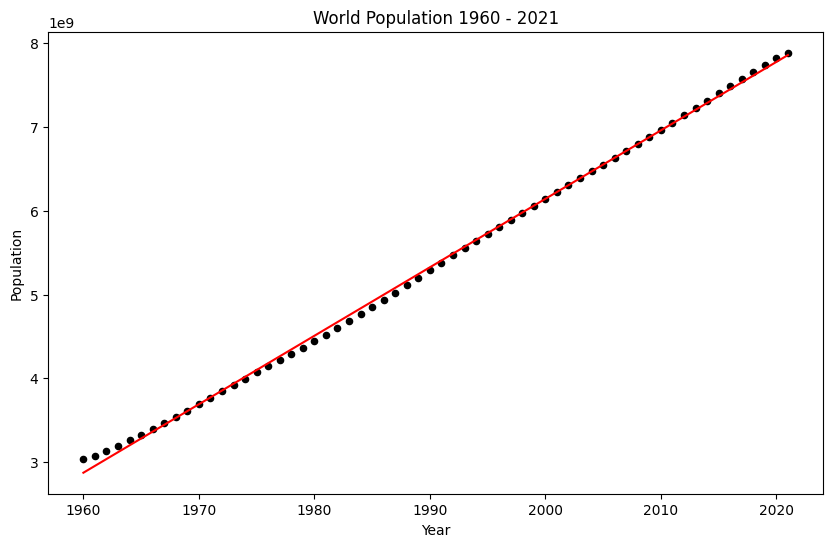

'World Population = 81766657 * Year + -157389829555'

In [76]:
# plotting the regression line on the scatter plot

datosMundo.plot(kind='scatter', x='date', y='value', figsize=(10, 6), color='black')

plt.title('World Population 1960 - 2021')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'World Population = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

## **Predicción de población China e India** 

In [77]:
#La población en 2050 podria estimarse como 
Year=2050
world_Population = 81766657 * Year + -157389829555

formatted_population = '{:,}'.format(world_Population)
print(f"La población en el año {Year} podría estimarse como {formatted_population}")


La población en el año 2050 podría estimarse como 10,231,817,295


In [79]:
# Mismo ejercicio para india y china en 2023
datosIndia=df[df['country.value']=='India']
datosChina=df[df['country.value']=='China']

# fitting 
xIndia = datosIndia['date']      
yIndia = datosIndia['value']    
fitIndia = np.polyfit(xIndia, yIndia, deg=1)

# fitting 
xChina = datosChina['date']      
yChina = datosChina['value']    
fitChina = np.polyfit(xChina, yChina, deg=1)


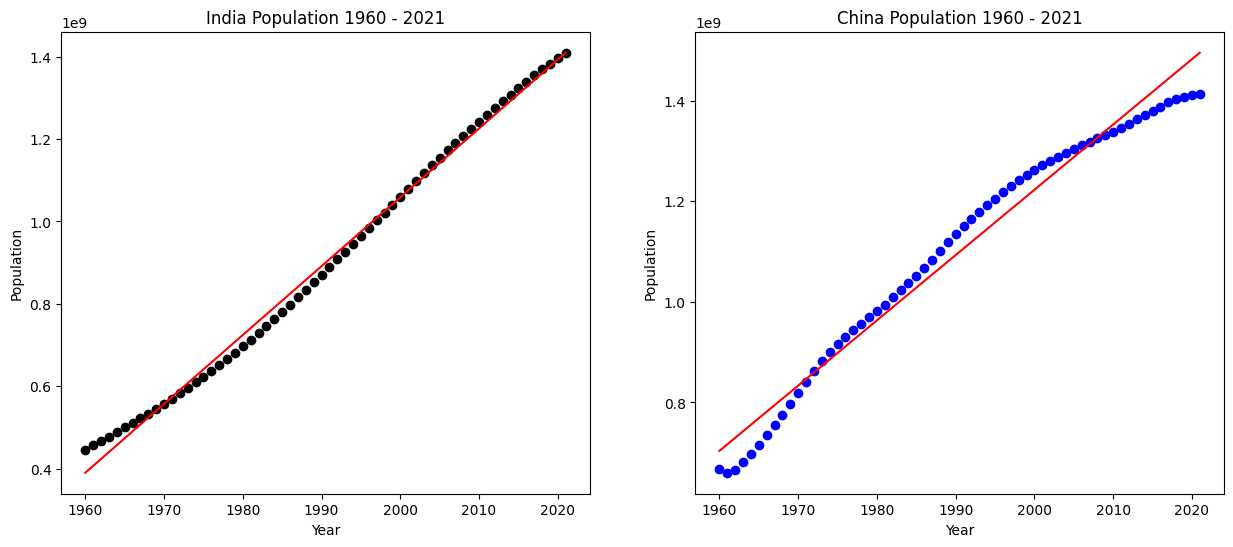

India Population = 16710460 * Year + -32362450856
China Population = 12973884 * Year + -24725143833


In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6)) # crear dos subtramas

# trazar datos en la primera subtrama
axs[0].scatter(datosIndia['date'], datosIndia['value'], color='black')
axs[0].set_title('India Population 1960 - 2021')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Population')

# trazar datos en la segunda subtrama
axs[1].scatter(datosChina['date'], datosChina['value'], color='blue')
axs[1].set_title('China Population 1960 - 2021')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Population')

# plot line of best fit
axs[0].plot(x, fitIndia[0] * x + fitIndia[1], color='red') # recall that x is the Years
axs[0].annotate('y={0:.0f} x + {1:.0f}'.format(fitIndia[0], fitIndia[1]), xy=(2000, 150000))

# plot line of best fit
axs[1].plot(x, fitChina[0] * x + fitChina[1], color='red') # recall that x is the Years
axs[1].annotate('y={0:.0f} x + {1:.0f}'.format(fitChina[0], fitChina[1]), xy=(2000, 150000))


plt.show()

# imprimir la ecuación de la línea de regresión
print('India Population = {0:.0f} * Year + {1:.0f}'.format(fitIndia[0], fitIndia[1]))
print('China Population = {0:.0f} * Year + {1:.0f}'.format(fitChina[0], fitChina[1]))


In [81]:
#Prediccion en paises
Year=2023
world_PopulationIndia = fitIndia[0] * Year + fitIndia[1]
world_PopulationChina = fitChina[0] * Year + fitChina[1]

formatted_populationIndia = '{:,}'.format(world_PopulationIndia)
formatted_populationChina = '{:,}'.format(world_PopulationChina)

print(f"La población de India en el año {Year} podría estimarse como {formatted_populationIndia}")
print(f"La población de China en el año {Year} podría estimarse como {formatted_populationChina}")

La población de India en el año 2023 podría estimarse como 1,442,809,812.7296867
La población de China en el año 2023 podría estimarse como 1,521,024,389.4638863


In [82]:
Year=2023
IndiaPopulation = 16710460 * Year + -32362450856
ChinaPopulation = 12973884 * Year + -24725143833
print(IndiaPopulation)
print(ChinaPopulation)

1442809724
1521023499
